# House Prices - Advanced Regression Techniques.

In [1]:
# imports

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
import csv

### Get the data.

In [2]:
# diplay full rows.
pd.set_option('display.max_rows', None)
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

### Display the first 5 rows of the data using head().

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Get more info about the data (non-null count, data type) using info().

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

### Get numrical info about the data (mean, std, etc) using describe().

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Plot a histogram of each attribute using hist(). 

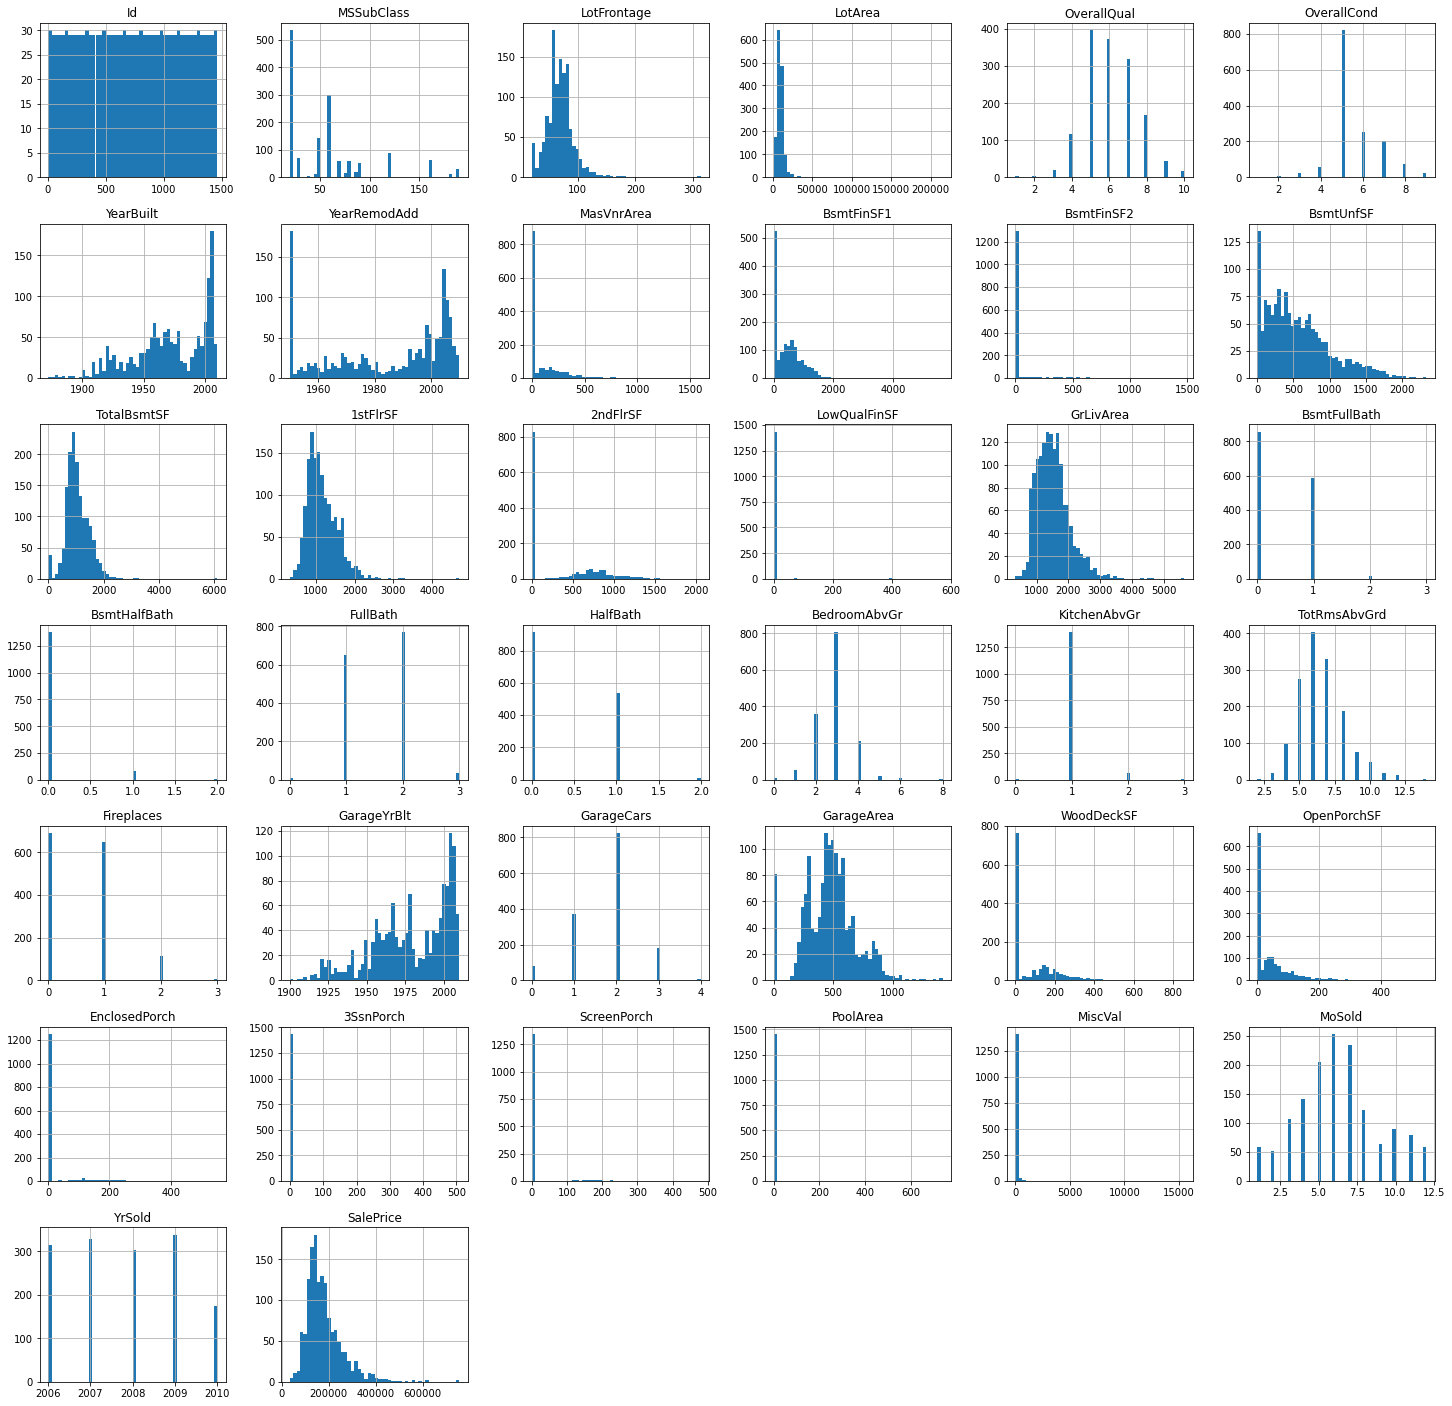

In [7]:
train_data.hist(bins= 50, figsize= (25, 25))
plt.show()

### As the data is not too large, we can compute the correlation coefficient using corr().

In [8]:
corr_matrix = train_data.corr()
corr_matrix['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### Before we get into the preprocessing we need to remove the label from the train set. 

In [9]:
train = train_data.drop('SalePrice', axis= 1)
train_label = train_data['SalePrice'].copy()

### Divide the numrical data and categorical data to work on the preprocessing. 

In [10]:
train_num = train.drop(train.select_dtypes(include=['object']), axis= 1)
train_cat = train.drop(train.select_dtypes(include=['int64', 'float64']), axis= 1)

### Here we work on piplines:
#### For numrical data:
1. SimpleImputer(strategy= 'median')), to fill the missing data with median strategy.
2. StandardScaler(), to apply saceling.

#### For categorical data:
1. SimpleImputer(strategy= 'constant', fill_value= 'Unknown')), to fill the missing data with new category 'Unknown'.
2. OneHotEncoder(handle_unknown = 'ignore'), to transform the data into onehot encoding.


In [11]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy= 'median')),
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy= 'constant', fill_value= 'Unknown')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
]) 

### Now we will make a full_pipeline using ColumnTransformer() to do all prepreocessing in one shot.

In [12]:
# ColumnTransformer
# this step will remove the division step
num_att = list(train_num)
cat_att = list(train_cat)
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_att),
    ('cat', cat_pipeline, cat_att)
])
train_prepared = full_pipeline.fit_transform(train)

### Now we will try two models (LinearRegression, and RandomForestRegressor ).
### We will measure these two models to select one of them using (mean_squared_error(), and cross_val_score()).

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_label)
train_prediction = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_label, train_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20510.504141690137

In [14]:
ran_reg = RandomForestRegressor()
ran_reg.fit(train_prepared, train_label)
train_prediction = ran_reg.predict(train_prepared)
ran_mse = mean_squared_error(train_label, train_prediction)
ran_rmse = np.sqrt(ran_mse)
ran_rmse

10901.69490760713

In [15]:
lin_scores = cross_val_score(lin_reg, train_prepared, train_label, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([ 23882.7455913 ,  34755.31300908,  23482.89319411,  41472.80324316,
        30280.75617526,  44404.11598141,  24275.44489109,  22722.34081583,
        67932.23468183, 106990.84311142])

In [16]:
ran_scores = cross_val_score(ran_reg, train_prepared, train_label, scoring="neg_mean_squared_error", cv=10)
ran_rmse_scores = np.sqrt(-ran_scores)
ran_rmse_scores

array([25323.44057434, 27441.95188882, 22530.64385229, 40107.35890502,
       33132.22800117, 26519.11353885, 24281.41375917, 25258.3589772 ,
       41270.06011379, 27167.38313467])

### We Select RandomForestRegressor(), so we will fine tune it to ge the best hyperparameters using GridSearchCV(). 

In [17]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

ran_reg = RandomForestRegressor()

grid_search = GridSearchCV(ran_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(train_prepared, train_label)

grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

### After training the model, it is a good practice to save the trained model if you want to use it later using joblib. 

In [18]:
joblib.dump(ran_reg, 'RandomForestResgressor.joblib')

['RandomForestResgressor.joblib']

### Last part is to test your model on the test set.

In [19]:
final_model = grid_search.best_estimator_

# note here do not use fit_tarnsform()
test_prepared = full_pipeline.transform(test_data)


final_prediction = final_model.predict(test_prepared)
final_prediction.shape

(1459,)